# Index   

0. [Importing libraries](##Importing-libraries) 


1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

 [Reading the data set](###Reading-the-data-set)

2. [Data Enginnering](#Dara-Engineering)
 
3. [Model Screening with Pycaret](#Model-screening-with-PycaretModel-Screening)

4. [Tunning Random Forest Hyperparameters with Optuna](##Random-Forest-Hyperparameters-tunning-with-Optuna)

5. [Prediction of test_X](##test_X-prediction)



### Importing libraries

In [328]:
#Data exploration & manipulation
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter
import seaborn as sns
import matplotlib.style as style 
import datetime as dt
import os
import matplotlib.pyplot as plt

#ML Models search and optimisation
from pycaret.classification import * 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA

# Exploratory Data Analysis

### Data Extraction

In [295]:
# Import train.csv
train_diag_Cancer_df = pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Access_Project_Hackathon_IT_Decathlon\initial docs\train.csv', index_col=None)

### Data exploration

In [296]:
train_diag_Cancer_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        10.71         20.39           69.50      344.9   
1          0        13.64         16.34           87.21      571.8   
2          0        11.71         17.19           74.68      420.3   
3          1        15.30         25.27          102.40      732.4   
4          1        14.45         20.22           94.49      642.7   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.10820           0.12890         0.08448              0.02867   
1          0.07685           0.06059         0.01857              0.01723   
2          0.09774           0.06141         0.03809              0.03239   
3          0.10820           0.16970         0.16830              0.08751   
4          0.09872           0.12060         0.11800              0.05980   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1668  ...         11.69          25.21            76.51   
1         0.1353  ...         14.67          23.19            96.08   
2         0.1516  ...         13.01          21.39            84.42   
3         0.1926  ...         20.27          36.71           149.30   
4         0.1950  ...         18.33          30.12           117.90   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       410.4            0.1335             0.2550           0.2534   
1       656.7            0.1089             0.1582           0.1050   
2       521.5            0.1323             0.1040           0.1521   
3      1269.0            0.1641             0.6110           0.6335   
4      1044.0            0.1552             0.4056           0.4967   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.08600          0.2605                  0.08701  
1               0.08586          0.2346                  0.08025  
2               0.10990          0.2572                  0.07097  
3               0.20240          0.4027                  0.09876  
4               0.18380          0.4753                  0.10130  

[5 rows x 31 columns]

In [297]:
train_diag_Cancer_df.shape

(455, 31)

Initial data frame is made of 31 columns, including the target column as 'diagnosis' and other 30 that look like data extracted from a mammogram, and 455 lines/registers that correspond to different mamogramms/medical test of patients. Let's explore them:

In [298]:
train_diag_Cancer_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No null values were detected.

In [299]:
train_diag_Cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

In [300]:
train_diag_Cancer_df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  455.000000   455.000000    455.000000      455.000000   455.000000   
mean     0.373626    14.139000     19.306286       92.086044   657.829890   
std      0.484299     3.625935      4.267421       24.998077   363.536865   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.705000     16.210000       75.015000   419.250000   
50%      0.000000    13.300000     18.890000       85.980000   546.400000   
75%      1.000000    15.740000     21.795000      103.650000   777.250000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       455.000000        455.000000      455.000000           455.000000   
mean          0.096849          0.105557        0.090775             0.049585   
std           0.013981          0.052932        0.080993             0.039159   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086740          0.066735        0.030180             0.020720   
50%           0.096860          0.094860        0.063870             0.033840   
75%           0.106050          0.130450        0.132200             0.074490   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     455.000000  ...    455.000000     455.000000       455.000000   
mean        0.181319  ...     16.276679      25.823099       107.319516   
std         0.027140  ...      4.897917       6.123728        34.025815   
min         0.116700  ...      7.930000      12.020000        50.410000   
25%         0.162050  ...     12.980000      21.350000        84.290000   
50%         0.179700  ...     14.990000      25.440000        97.660000   
75%         0.195800  ...     18.550000      29.990000       124.950000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   455.000000        455.000000         455.000000       455.000000   
mean    882.553187          0.133482           0.256997         0.278242   
std     574.721873          0.022902           0.157587         0.211802   
min     185.200000          0.081250           0.034320         0.000000   
25%     513.950000          0.118350           0.151650         0.119350   
50%     688.600000          0.132600           0.215600         0.229900   
75%    1047.000000          0.147950           0.333800         0.387200   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            455.000000      455.000000               455.000000  
mean               0.115695        0.290325                 0.084309  
std                0.065949        0.059696                 0.018168  
min                0.000000        0.156500                 0.055040  
25%                0.065080        0.251550                 0.071835  
50%                0.099930        0.283300                 0.080190  
75%                0.161950        0.317500                 0.092070  
max                0.291000        0.577400                 0.207500  

[8 rows x 31 columns]

All columns/features are numeric values (float type). However ranges of values and distributions are different. Standarization of the data is likely to favour same ponderance for the differents features/columns .

In [301]:
y = train_diag_Cancer_df.diagnosis

Text(0, 0.5, '# of instances')

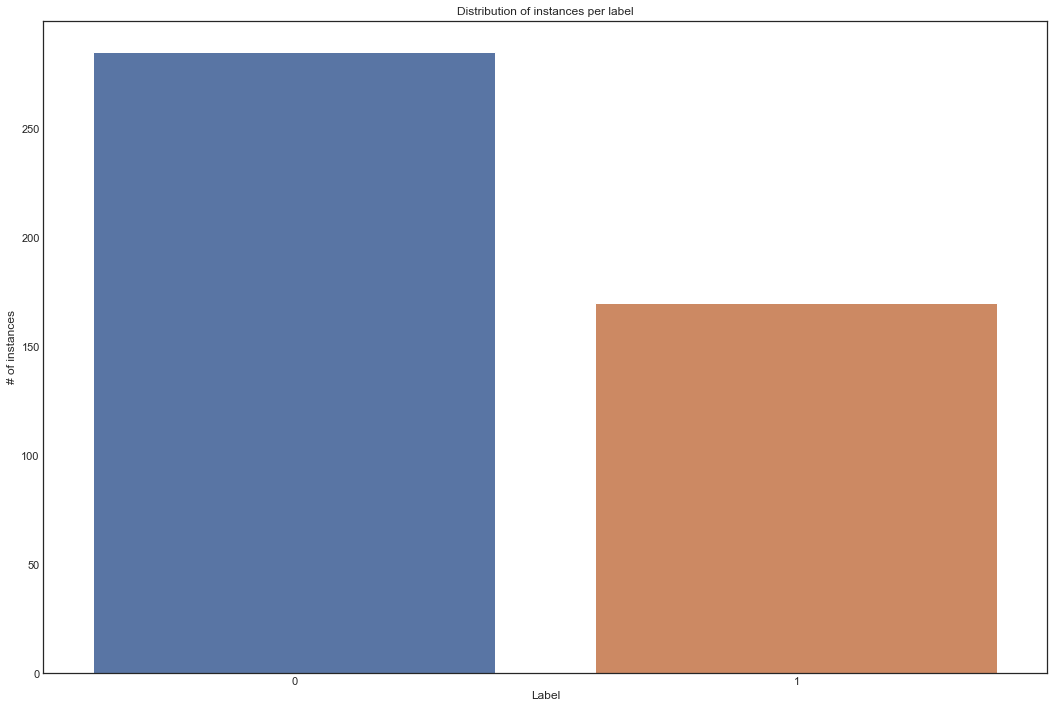

In [302]:
#Label distribution checking
sns.set_context("notebook")
style.use('seaborn-white')    
counter = Counter(y)
dist_plot=sns.barplot(x=list(counter.keys()), 
                    y=list(counter.values()))
dist_plot.set_title('Distribution of instances per label')
dist_plot.set_xlabel('Label')
dist_plot.set_ylabel('# of instances')

In [303]:
ratio_labels= [x/len(y) for x in list(counter.values())]
ratio_labels

[0.6263736263736264, 0.37362637362637363]

Although the distribution of samples is nearly 1 to 2 (0 vs 1 or benign vs mailgn), it can not be considered a very unballanced population. the difference of ditribution of samples should work fine for classification algorithm but it can be considered to perform some slight oversampling of registers with label 1. 

Let's have a look on the relations between features and its distributions:

Text(0.5, 0.98, 'Pair plot of disgnostic data differentiatiny by diagnose')

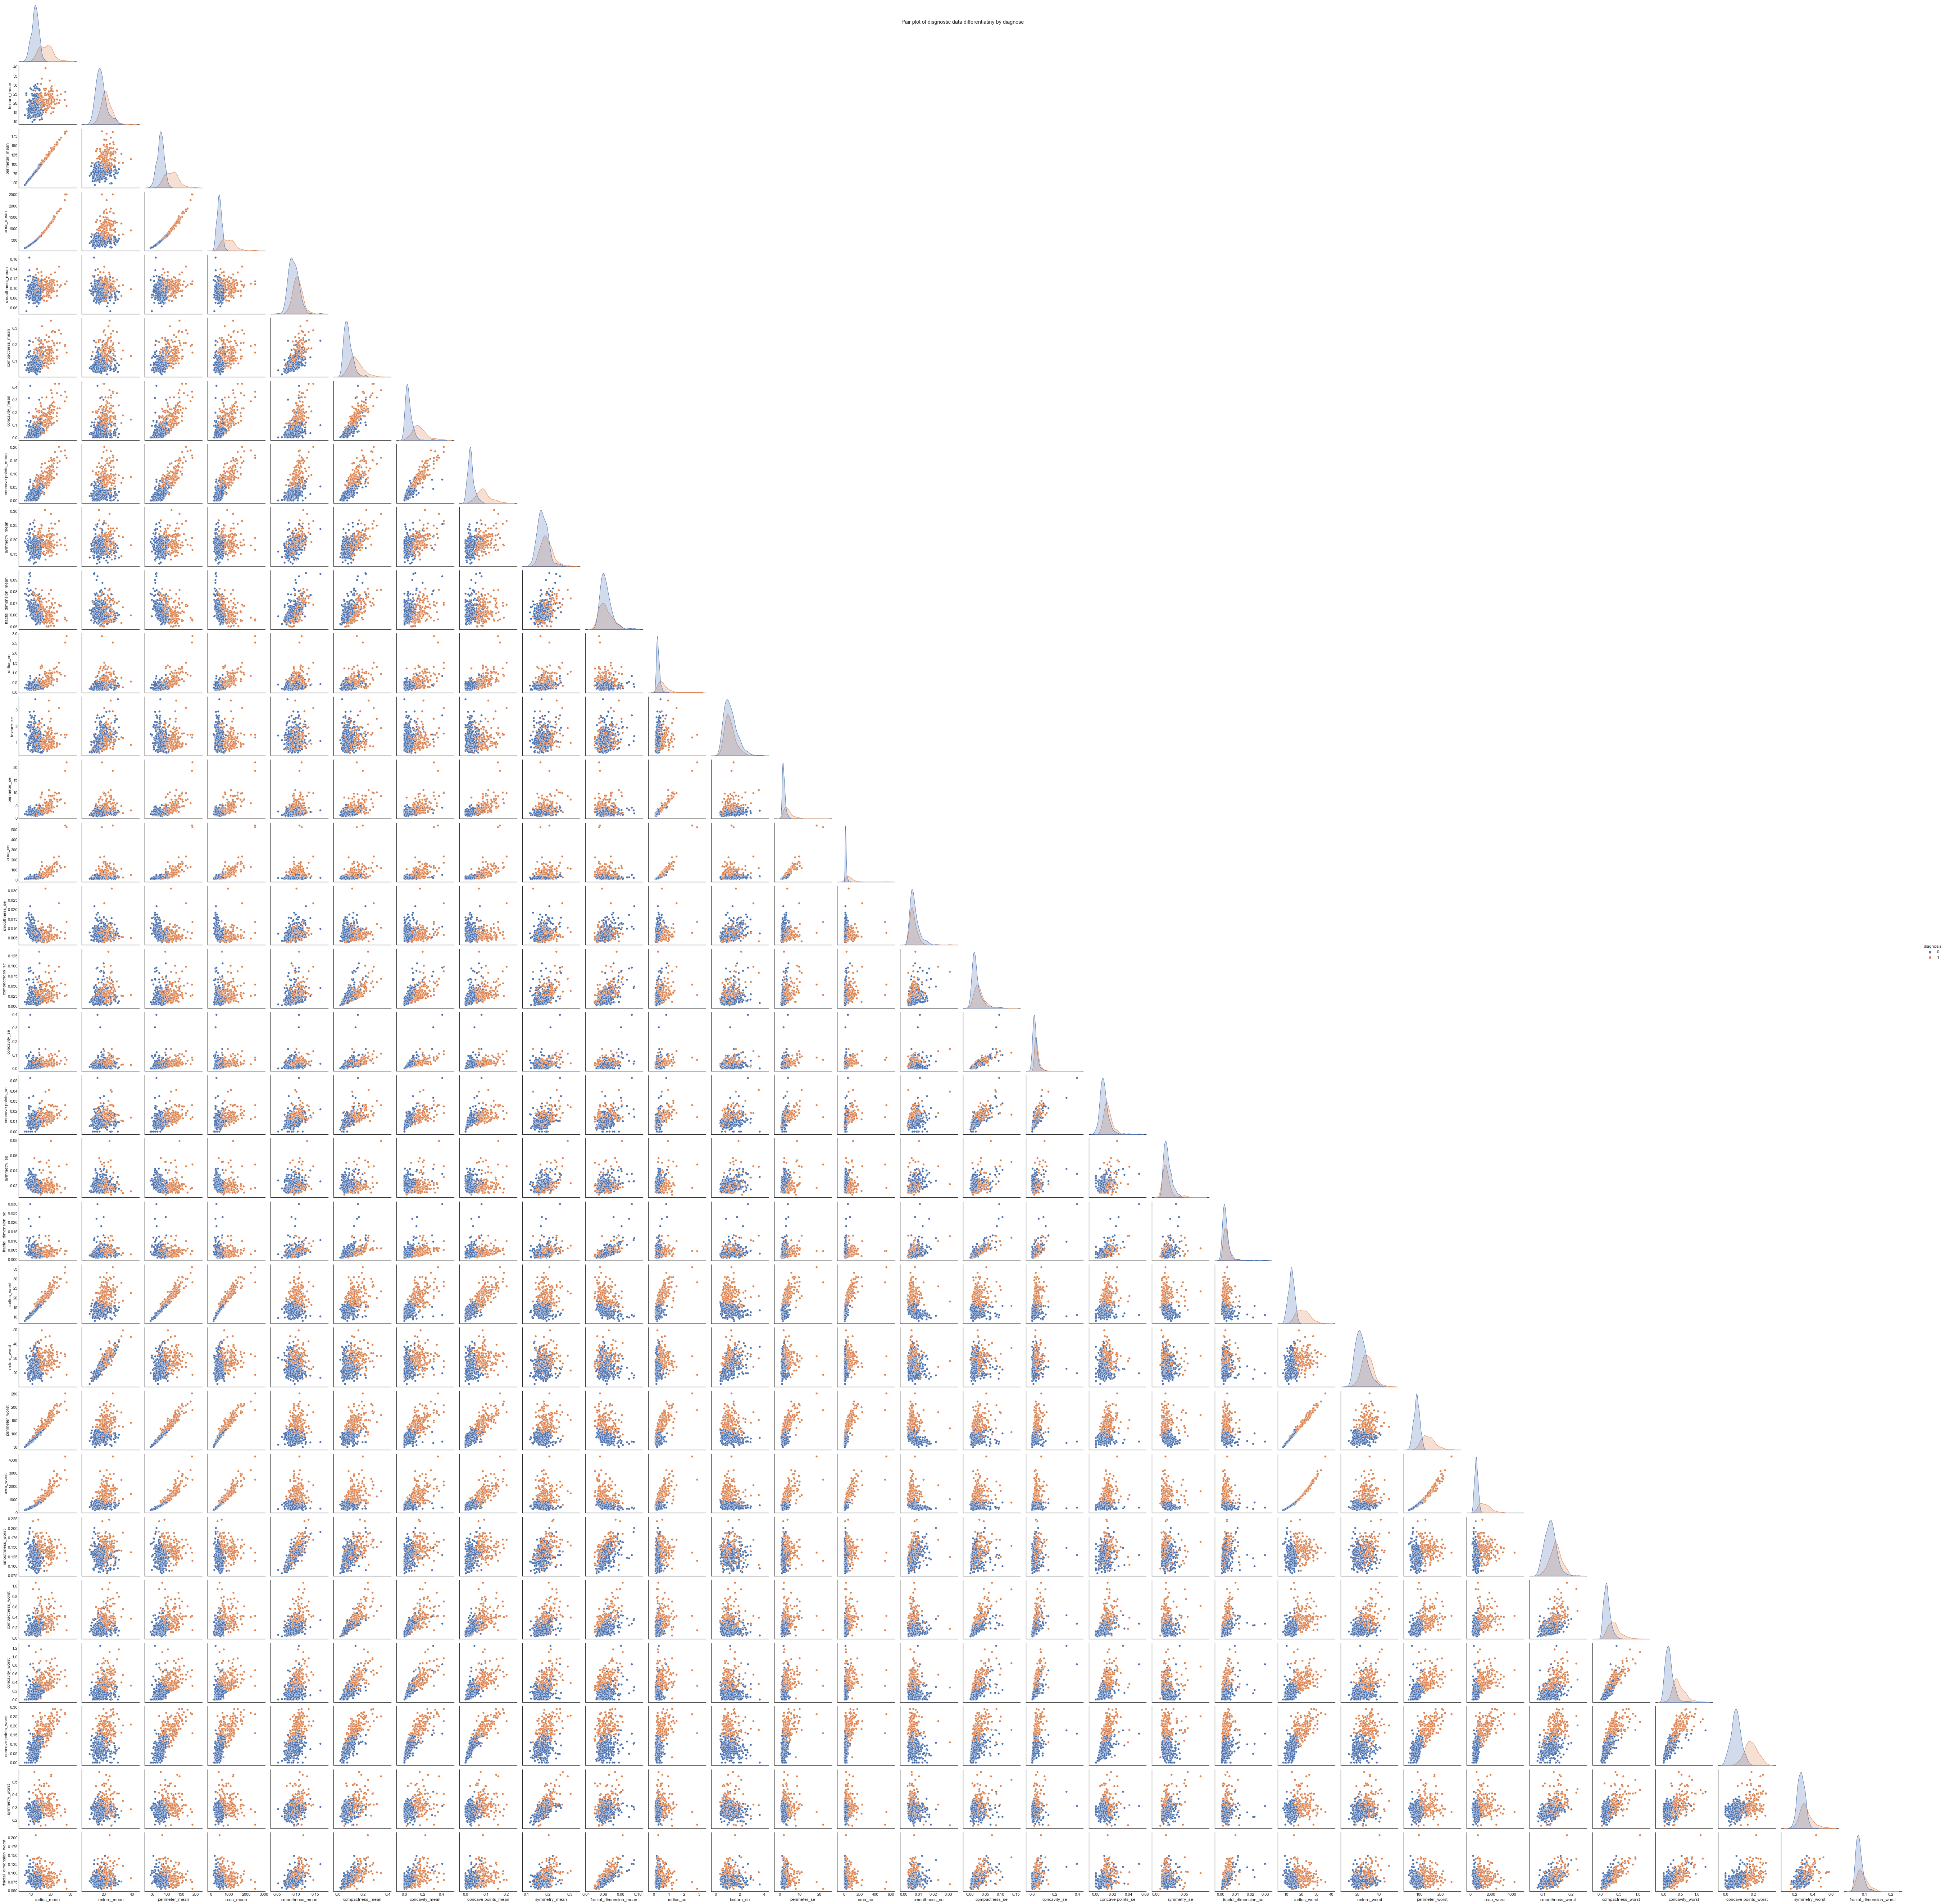

In [304]:
pairplot_diagnosis_data = sns.pairplot(train_diag_Cancer_df, corner=True,hue='diagnosis')
pairplot_diagnosis_data.fig.suptitle('Pair plot of disgnostic data differentiatiny by diagnose', y=1.02)

From the previous plot it can be observed:
- In some plots a diagonal line can be observed, which indicates high correlation between the features. (It will be studied deeper in the next point) 
- A clear difference of distribution depending on the diagnosis value (orange vs blue) can be observed in several plots.
- Distribution of populations of diagnosis can be assumed as Gaussian

In [305]:
X_train = train_diag_Cancer_df.copy()
X_train.drop('diagnosis',axis = 1, inplace=True)
X_train.shape

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         10.710         20.39           69.50      344.9          0.10820   
1         13.640         16.34           87.21      571.8          0.07685   
2         11.710         17.19           74.68      420.3          0.09774   
3         15.300         25.27          102.40      732.4          0.10820   
4         14.450         20.22           94.49      642.7          0.09872   
..           ...           ...             ...        ...              ...   
450       13.170         21.81           85.42      531.5          0.09714   
451       15.100         16.39           99.58      674.5          0.11500   
452       14.710         21.59           95.55      656.9          0.11370   
453        9.606         16.84           61.64      280.5          0.08481   
454        8.950         15.76           58.74      245.2          0.09462   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.12890         0.08448              0.02867         0.1668   
1             0.06059         0.01857              0.01723         0.1353   
2             0.06141         0.03809              0.03239         0.1516   
3             0.16970         0.16830              0.08751         0.1926   
4             0.12060         0.11800              0.05980         0.1950   
..                ...             ...                  ...            ...   
450           0.10470         0.08259              0.05252         0.1746   
451           0.18070         0.11380              0.08534         0.2001   
452           0.13650         0.12930              0.08123         0.2027   
453           0.09228         0.08422              0.02292         0.2036   
454           0.12430         0.09263              0.02308         0.1305   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.06862  ...        11.690          25.21   
1                   0.05953  ...        14.670          23.19   
2                   0.06095  ...        13.010          21.39   
3                   0.06540  ...        20.270          36.71   
4                   0.06466  ...        18.330          30.12   
..                      ...  ...           ...            ...   
450                 0.06177  ...        16.230          29.89   
451                 0.06467  ...        16.110          18.33   
452                 0.06758  ...        17.870          30.70   
453                 0.07125  ...        10.750          23.07   
454                 0.07163  ...         9.414          17.07   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0              76.51       410.4            0.1335             0.2550   
1              96.08       656.7            0.1089             0.1582   
2              84.42       521.5            0.1323             0.1040   
3             149.30      1269.0            0.1641             0.6110   
4             117.90      1044.0            0.1552             0.4056   
..               ...         ...               ...                ...   
450           105.50       740.7            0.1503             0.3904   
451           105.90       762.6            0.1386             0.2883   
452           115.70       985.5            0.1368             0.4290   
453            71.25       353.6            0.1233             0.3416   
454            63.34       270.0            0.1179             0.1879   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.2534               0.08600          0.2605   
1             0.1050               0.08586          0.2346   
2             0.1521               0.10990          0.2572   
3             0.6335               0.20240          0.4027   
4             0.4967               0.18380          0.4753   
..               ...                   ...             ...   
450           0.3728               0.16070         

Text(0.5, 1.0, 'Correlation of values of diagnostic test data')

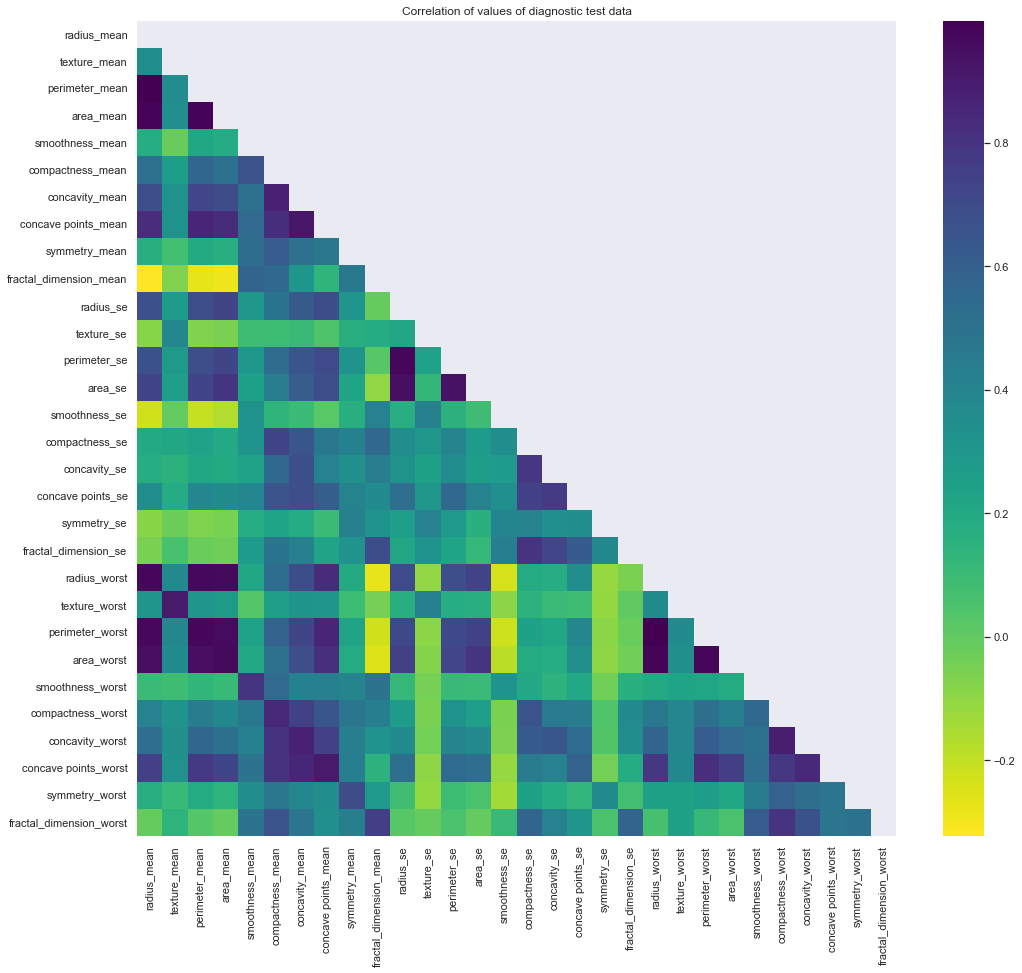

In [307]:
# Getting the Lower Triangle of the co-relation matrix
sns.set(rc={"figure.figsize":(17,15)}) #width=3, #height=4
matrix = np.triu(X_train.corr())
heatmap_correlations_diag_data = sns.heatmap(X_train.corr(), annot=False, cmap='viridis_r', mask=matrix)
heatmap_correlations_diag_data.set_title('Correlation of values of diagnostic test data')

From the previous graph, it can be observed that there are several features with a high correlation. To improve the performance of the screening of models (memory and speed of calculus) and to avoid overfitting, dimension reduction should be done by the **Principal Component Analysis**.

# Data Engineering

There is no need to clean, and it may be tried some data engineering of the Data set. Let's consider to check normalization, standarization and treating outliers with robustscaler:

In [308]:
x = train_diag_Cancer_df.drop('diagnosis',axis=1).values #returns a numpy array
numerical_cols=list(X_train.columns)

In [309]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_min_max_scaled = pd.DataFrame(x_scaled, columns =numerical_cols)

In [310]:
robust_scaler = preprocessing.RobustScaler()
X_train_robust = robust_scaler.fit_transform(x)
X_train_robust = pd.DataFrame(X_train_robust, columns =numerical_cols)

In [311]:
robust_scaler = preprocessing.RobustScaler()
X_train_robust_2 = robust_scaler.fit_transform(x)
robust_std_caler = preprocessing.StandardScaler()
X_train_robust_standard = robust_std_caler.fit_transform(X_train_robust_2)
X_train_robust_standard = pd.DataFrame(X_train_robust_standard, columns =numerical_cols)

In [312]:
standard_scaler = preprocessing.StandardScaler()
X_train_standard = standard_scaler.fit_transform(x)
X_train_standard = pd.DataFrame(X_train_standard, columns =numerical_cols)

In [313]:
X_train_min_max_scaled ['diagnosis'] = train_diag_Cancer_df['diagnosis']
X_train_robust ['diagnosis'] = train_diag_Cancer_df['diagnosis']
X_train_standard ['diagnosis'] = train_diag_Cancer_df['diagnosis']
X_train_robust_standard ['diagnosis'] = train_diag_Cancer_df['diagnosis']

In [314]:
X_train_robust.describe()

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   455.000000    455.000000      455.000000  455.000000       455.000000   
mean      0.207931      0.074536        0.213237    0.311257        -0.000582   
std       0.898621      0.764086        0.872990    1.015466         0.724034   
min      -1.566047     -1.643688       -1.473372   -1.125419        -2.290523   
25%      -0.395291     -0.479857       -0.382923   -0.355168        -0.524081   
50%       0.000000      0.000000        0.000000    0.000000         0.000000   
75%       0.604709      0.520143        0.617077    0.644832         0.475919   
max       3.670384      3.650850        3.580234    5.459777         3.445883   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        455.000000      455.000000           455.000000     455.000000   
mean           0.167883        0.263722             0.292813       0.047974   
std            0.830762        0.793896             0.728259       0.804134   
min           -1.184650       -0.626054            -0.629347      -1.866667   
25%           -0.441419       -0.330229            -0.244002      -0.522963   
50%            0.000000        0.000000             0.000000       0.000000   
75%            0.558581        0.669771             0.755998       0.477037   
max            3.932198        3.557440             3.112516       3.682963   

       fractal_dimension_mean  ...  texture_worst  perimeter_worst  \
count              455.000000  ...     455.000000       455.000000   
mean                 0.161949  ...       0.044340         0.237568   
std                  0.829850  ...       0.708765         0.836838   
min                 -1.365135  ...      -1.553241        -1.162076   
25%                 -0.431684  ...      -0.473380        -0.328824   
50%                  0.000000  ...       0.000000         0.000000   
75%                  0.568316  ...       0.526620         0.671176   
max                  4.028269  ...       2.789352         3.776193   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count  455.000000        455.000000         455.000000       455.000000   
mean     0.363856          0.029800           0.227268         0.180483   
std      1.078176          0.773724           0.865152         0.790750   
min     -0.944377         -1.734797          -0.995224        -0.858316   
25%     -0.327643         -0.481419          -0.351084        -0.412731   
50%      0.000000          0.000000           0.000000         0.000000   
75%      0.672357          0.518581           0.648916         0.587269   
max      6.688678          3.040541           4.624760         3.815942   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            455.000000      455.000000               455.000000   
mean               0.162743        0.106514                 0.203574   
std                0.680796        0.905164                 0.897835   
min               -1.031589       -1.922669                -1.242896   
25%               -0.359761       -0.481425                -0.412898   
50%                0.000000        0.000000                 0.000000   
75%                0.640239        0.518575                 0.587102   
max                1.972437        4.459439                 6.291574   

        diagnosis  
count  455.000000  
mean     0.373626  
std      0.484299  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  

[8 rows x 31 columns]

# Model screening with Pycaret

In [26]:
# To get modular programation, next funtions are created to perform screening of Models with Pycaret
# to test different initial dataframes and session_id. 

def setup_pycaret(df, session_id):
    ''' funtion to make the setup of Pycaret
    Input: data Frame and session id
    Output: none 
    '''
    setup(train_diag_Cancer_df,
          target='diagnosis',
          session_id = session_id,
          silent = True
    )

def screen_models_pycaret(df, session_id,  name_df):
    ''' funtion to do screening with Pycaret
    Input: data Frame, session_id and name of the initial dataframe
    Output: dicctionary which contains the followin info KEY = CONTENT:
        'best_metod' = the best method of the screening with hyperparameters 
        'results_df' = a pandas dataframe with the results of the screening with all methodologies
    '''
    setup_pycaret(df, session_id)
    best_model=compare_models()
    df_results= pycaret.classification.pull() #extract results as data frame
    df_results.insert(loc = 0, column ='Initial df', value= name_df) #introduce name of initial df
    df_results.reset_index(drop=True, inplace=True) #remove old index
    results_dictionary ={'best_method' : best_model, 'results_df':  df_results }
    return results_dictionary

### No dimension reduction in features

With Pycaret we test different dataframes with several models to check its performance:

In [27]:
dict_unmodified_df_1 = screen_models_pycaret(train_diag_Cancer_df, 1,  'df not modified')
dict_unmodified_df_42 = screen_models_pycaret(train_diag_Cancer_df, 42,  'df not modified')
dict_unmodified_df_69 = screen_models_pycaret(train_diag_Cancer_df, 69,  'df not modified')


Let's try with the data modified with data engineering: MinMaxScaler, Standarization, RobustScaler and RobustScaler+Standarization. 

In [28]:
dict_standard_scaled_df_1 = screen_models_pycaret(X_train_standard, 1,  'df standard scaled')
dict_standard_scaled_df_42 = screen_models_pycaret(X_train_standard, 42,  'df standard scaled')
dict_standard_scaled_df_69 = screen_models_pycaret(X_train_standard, 69,  'df standard scaled')

In [35]:
dict_min_max_scaled_df_1 = screen_models_pycaret(X_train_min_max_scaled, 1,  'df min_max scaled')
dict_min_max_scaled_df_42 = screen_models_pycaret(X_train_min_max_scaled, 42,  'df min_max scaled')
dict_min_max_scaled_df_69 = screen_models_pycaret(X_train_min_max_scaled, 69,  'df min_max scaled')

In [29]:
dict_robust_scaled_df_1 = screen_models_pycaret(X_train_robust, 1,  'df robust scaled')
dict_robust_scaled_df_42 = screen_models_pycaret(X_train_robust, 42,  'df robust scaled')
dict_robust_scaled_df_69 = screen_models_pycaret(X_train_robust, 69,  'df robust scaled')

In [30]:
dict_robust_standard_scaled_df_1 = screen_models_pycaret(X_train_robust_standard, 1,  'df robust_standard scaled')
dict_robust_standard_scaled_df_42 = screen_models_pycaret(X_train_robust_standard, 42,  'df robust_standard scaled')
dict_robust_standard_scaled_df_69 = screen_models_pycaret(X_train_robust_standard, 69,  'df robust_standard scaled')

Let's compile in different dataframes the scoring results grouped by the initial state used (1, 42 or 69 each in a different dataframe):

In [37]:
all_results_screening_pycaret_initial_state1=pd.DataFrame()
for dictionary in [dict_unmodified_df_1, 
                    dict_min_max_scaled_df_1,
                    dict_standard_scaled_df_1 ,
                    dict_robust_scaled_df_1, 
                    dict_robust_standard_scaled_df_1
                    ]:
    join=[all_results_screening_pycaret_initial_state1, dictionary['results_df'].iloc[:2,:]]
    all_results_screening_pycaret_initial_state1 = pd.concat(join)
all_results_screening_pycaret_initial_state1.reset_index(drop=True, inplace=True)
all_results_screening_pycaret_initial_state1

Initial df                            Model  Accuracy  \
0            df not modified  Light Gradient Boosting Machine    0.9591   
1            df not modified        Extreme Gradient Boosting    0.9559   
2          df min_max scaled  Light Gradient Boosting Machine    0.9591   
3          df min_max scaled        Extreme Gradient Boosting    0.9559   
4         df standard scaled  Light Gradient Boosting Machine    0.9591   
5         df standard scaled        Extreme Gradient Boosting    0.9559   
6           df robust scaled  Light Gradient Boosting Machine    0.9591   
7           df robust scaled        Extreme Gradient Boosting    0.9559   
8  df robust_standard scaled  Light Gradient Boosting Machine    0.9591   
9  df robust_standard scaled        Extreme Gradient Boosting    0.9559   

      AUC  Recall   Prec.      F1   Kappa     MCC  TT (Sec)  
0  0.9850  0.9144  0.9756  0.9406  0.9096  0.9141     0.098  
1  0.9866  0.9144  0.9673  0.9362  0.9029  0.9076     0.274  
2  0.9850  0.9144  0.9756  0.9406  0.9096  0.9141     0.105  
3  0.9866  0.9144  0.9673  0.9362  0.9029  0.9076     0.159  
4  0.9850  0.9144  0.9756  0.9406  0.9096  0.9141     0.095  
5  0.9866  0.9144  0.9673  0.9362  0.9029  0.9076     0.159  
6  0.9850  0.9144  0.9756  0.9406  0.9096  0.9141     0.098  
7  0.9866  0.9144  0.9673  0.9362  0.9029  0.9076     0.175  
8  0.9850  0.9144  0.9756  0.9406  0.9096  0.9141     0.094  
9  0.9866  0.9144  0.9673  0.9362  0.9029  0.9076     0.201

In [38]:
all_results_screening_pycaret_initial_state42=pd.DataFrame()
for dictionary in [dict_unmodified_df_42, 
                    dict_min_max_scaled_df_42 , 
                    dict_standard_scaled_df_42 ,
                    dict_robust_scaled_df_42, 
                    dict_robust_standard_scaled_df_42
                    ]:
    join=[all_results_screening_pycaret_initial_state42, dictionary['results_df'].iloc[:2,:]]
    all_results_screening_pycaret_initial_state42 = pd.concat(join)
all_results_screening_pycaret_initial_state42.reset_index(drop=True, inplace=True)
all_results_screening_pycaret_initial_state42

Initial df                      Model  Accuracy     AUC  \
0            df not modified  Extreme Gradient Boosting    0.9623  0.9905   
1            df not modified       Ada Boost Classifier    0.9592  0.9749   
2          df min_max scaled  Extreme Gradient Boosting    0.9623  0.9905   
3          df min_max scaled       Ada Boost Classifier    0.9592  0.9749   
4         df standard scaled  Extreme Gradient Boosting    0.9623  0.9905   
5         df standard scaled       Ada Boost Classifier    0.9592  0.9749   
6           df robust scaled  Extreme Gradient Boosting    0.9623  0.9905   
7           df robust scaled       Ada Boost Classifier    0.9592  0.9749   
8  df robust_standard scaled  Extreme Gradient Boosting    0.9623  0.9905   
9  df robust_standard scaled       Ada Boost Classifier    0.9592  0.9749   

   Recall   Prec.      F1   Kappa     MCC  TT (Sec)  
0  0.9409  0.9612  0.9491  0.9192  0.9216     0.258  
1  0.9152  0.9774  0.9424  0.9109  0.9153     0.181  
2  0.9409  0.9612  0.9491  0.9192  0.9216     0.162  
3  0.9152  0.9774  0.9424  0.9109  0.9153     0.199  
4  0.9409  0.9612  0.9491  0.9192  0.9216     0.163  
5  0.9152  0.9774  0.9424  0.9109  0.9153     0.191  
6  0.9409  0.9612  0.9491  0.9192  0.9216     0.173  
7  0.9152  0.9774  0.9424  0.9109  0.9153     0.174  
8  0.9409  0.9612  0.9491  0.9192  0.9216     0.217  
9  0.9152  0.9774  0.9424  0.9109  0.9153     0.207

In [39]:
all_results_screening_pycaret_initial_state69=pd.DataFrame()
for dictionary in [dict_unmodified_df_69, 
                    dict_min_max_scaled_df_69 , 
                    dict_standard_scaled_df_69 ,
                    dict_robust_scaled_df_69, 
                    dict_robust_standard_scaled_df_69
                    ]:
    join=[all_results_screening_pycaret_initial_state69, dictionary['results_df'].iloc[:2,:]]
    all_results_screening_pycaret_initial_state69 = pd.concat(join)
all_results_screening_pycaret_initial_state69.reset_index(drop=True, inplace=True)
all_results_screening_pycaret_initial_state69

Initial df                            Model  Accuracy  \
0            df not modified  Light Gradient Boosting Machine    0.9749   
1            df not modified           Extra Trees Classifier    0.9655   
2          df min_max scaled  Light Gradient Boosting Machine    0.9749   
3          df min_max scaled           Extra Trees Classifier    0.9655   
4         df standard scaled  Light Gradient Boosting Machine    0.9749   
5         df standard scaled           Extra Trees Classifier    0.9655   
6           df robust scaled  Light Gradient Boosting Machine    0.9749   
7           df robust scaled           Extra Trees Classifier    0.9655   
8  df robust_standard scaled  Light Gradient Boosting Machine    0.9749   
9  df robust_standard scaled           Extra Trees Classifier    0.9655   

      AUC  Recall   Prec.      F1   Kappa     MCC  TT (Sec)  
0  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.096  
1  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.420  
2  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.110  
3  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.511  
4  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.101  
5  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.388  
6  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.111  
7  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.414  
8  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.106  
9  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.362

### PCA study (reduction on feature's dimension)

Let's check graphically the oss of variance along the reduction of feature dimension by PCA:

In [80]:
def remove_label(initial_df):
    '''Funtion to remove label column from dataframe
            Input: initial dataframe
            Output: Array without label column'''
    features=[ i for i in list(X_train_min_max_scaled.columns) if i !='diagnosis']
    df_no_label = initial_df.loc[:, features].values
    return df_no_label

In [98]:
def study_PCA (n_components, initial_df):    
    '''Funtion:to perform the PCA transformation to an inital dataframe which include the 'diagnosis' label column 
            Input: initial dataframe
            Output: total explained variance contained in the new df and a dataframe with reduced features by PCA'''  
    features=[ i for i in list(X_train_min_max_scaled.columns) if i !='diagnosis']
    array_no_label = remove_label(initial_df)        
    pca_breast = PCA(n_components=n_components)
    principalComponents_breast = pca_breast.fit_transform(array_no_label)
    list_columns=[]
    for i in range(0,n_components):
        column = 'PCA-'+str(i+1)
        list_columns.append(column)
    new_PCA_df = pd.DataFrame(principalComponents_breast,columns=list_columns)   
    return sum(pca_breast.explained_variance_ratio_), new_PCA_df

In [112]:
def check_correlation(df,width, height):
   ''' Funtion to check correlation by visualizatin with a graph of heatmap
         INPUT: dataframe with only numeric values, width nd height of the plot 
         OUTPUT: plot made with seaborn with scale pointing the most correlated features'''
   sns.set(rc={"figure.figsize":(width,height)}) 
   matrix = np.triu(df.corr())
   heatmap_correlations_diag_data = sns.heatmap(df.corr(), annot=False, cmap='viridis_r', mask=matrix)
   heatmap_correlations_diag_data.set_title('Correlation of values of diagnostic test data')    

Text(0, 0.5, 'Variance')

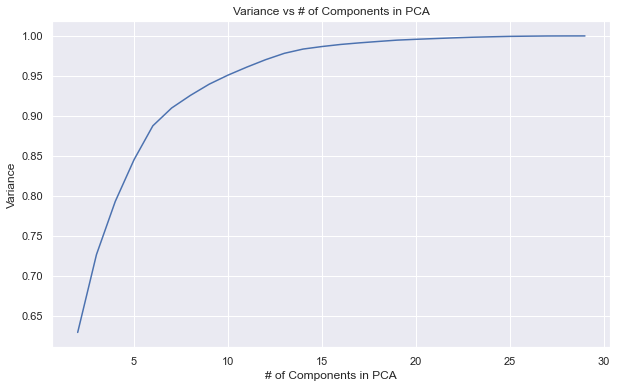

In [116]:
from sklearn.decomposition import PCA
x_axis=[]
y_axis=[]
list_df_PCA=[]

for i in range (2,30):
    x_axis.append(i)
    total_variance, df_PCA=study_PCA (i, X_train_standard)
    list_df_PCA.append(df_PCA)
    y_axis.append(total_variance)
fig, ax = plt.subplots(figsize = ( 10 , 6 ))
graph_pca=sns.lineplot(ax =ax, x= x_axis,  y=y_axis)
graph_pca.set_title('Variance vs # of Components in PCA')
graph_pca.set_xlabel('# of Components in PCA')
graph_pca.set_ylabel('Variance')

In [ ]:
Let's check different new dataframes with a lower dimensionality due to PCA study:

#### 25 Principal component analysis 

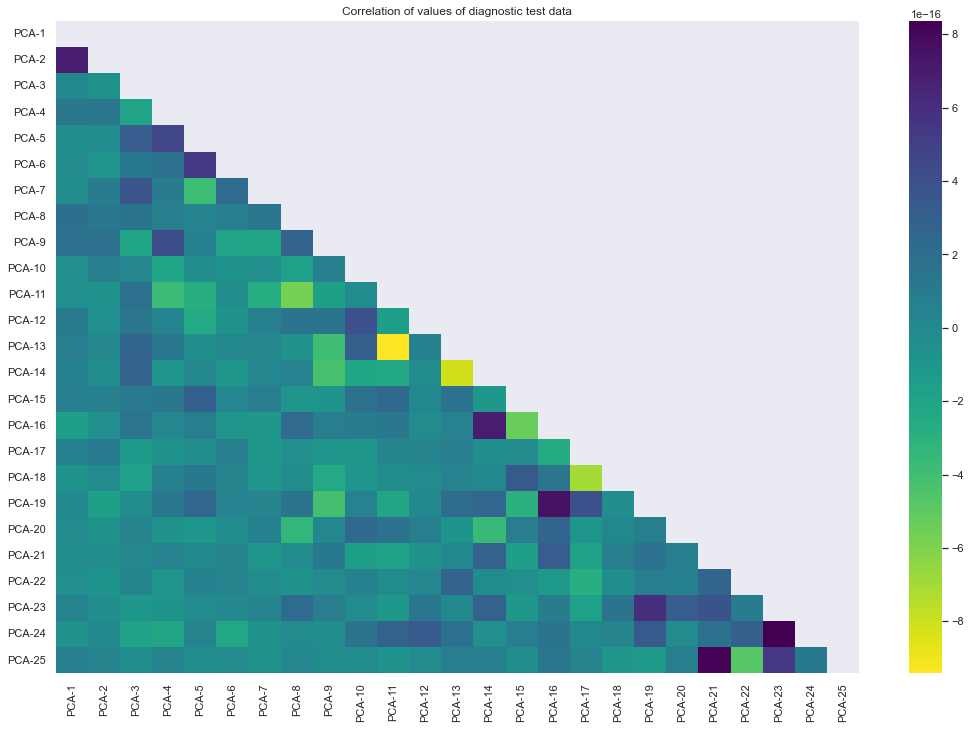

In [120]:
check_correlation(list_df_PCA[23] ,18, 12) 

#### 15 Principal components analysis 

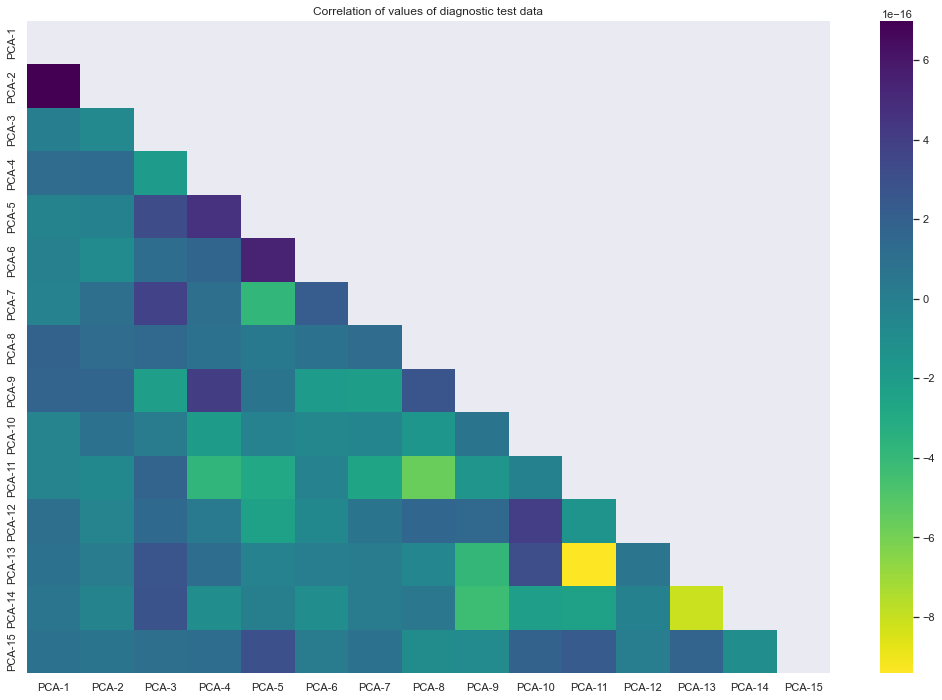

In [329]:
check_correlation(list_df_PCA[13] ,18, 12) 

#### 5 Principal components analysis 

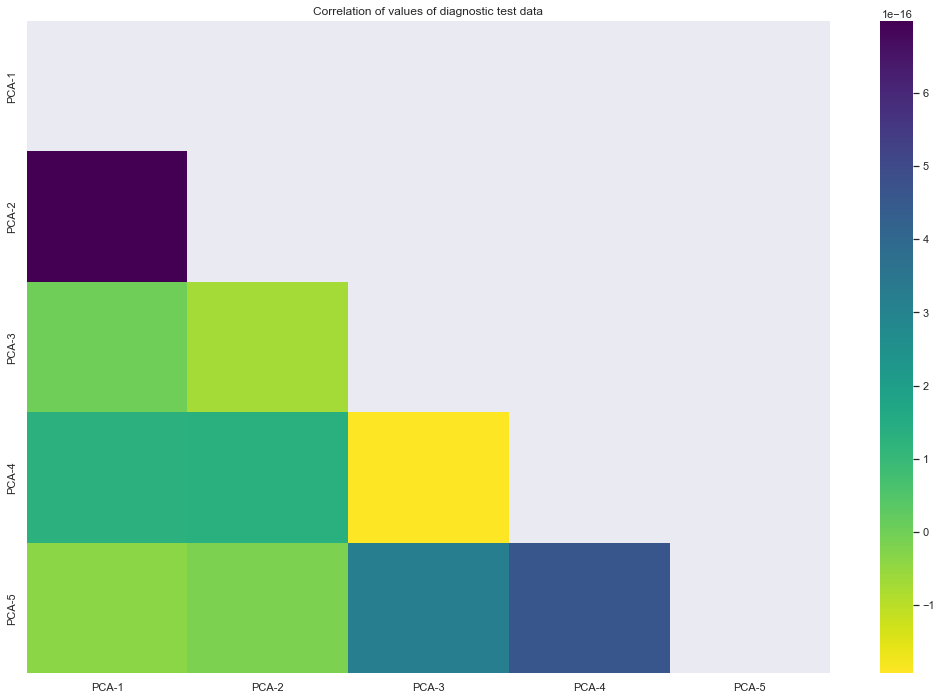

In [119]:
check_correlation(list_df_PCA[3] ,18, 12) 

**Conclusion of correlation in the PCA Analysis**:  correlation does not appear after doing PCA analysis in any of the graph (correlation values are very low comparing scales from correlation of the initial dataframe with no PCA )

Let's  check if the removal of correlation between features can improve the screening of models. First, diagnosis column has to be inserted to the dataframe. Reduction to 25 Principal Companents was chosen as it keeps most of the initial variance of the data. 

In [122]:
df_PCA25=list_df_PCA[23].copy()
df_PCA25['diagnosis']=X_train_standard['diagnosis']

In [123]:

dict_PCA25_69 = screen_models_pycaret(df_PCA25, 69,  'df PCA25')

In [126]:
all_results_screening_pycaret_initial_state69

Initial df                            Model  Accuracy  \
0            df not modified  Light Gradient Boosting Machine    0.9749   
1            df not modified           Extra Trees Classifier    0.9655   
2          df min_max scaled  Light Gradient Boosting Machine    0.9749   
3          df min_max scaled           Extra Trees Classifier    0.9655   
4         df standard scaled  Light Gradient Boosting Machine    0.9749   
5         df standard scaled           Extra Trees Classifier    0.9655   
6           df robust scaled  Light Gradient Boosting Machine    0.9749   
7           df robust scaled           Extra Trees Classifier    0.9655   
8  df robust_standard scaled  Light Gradient Boosting Machine    0.9749   
9  df robust_standard scaled           Extra Trees Classifier    0.9655   

      AUC  Recall   Prec.      F1   Kappa     MCC  TT (Sec)  
0  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.096  
1  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.420  
2  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.110  
3  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.511  
4  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.101  
5  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.388  
6  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.111  
7  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.414  
8  0.9933  0.9417  0.9917  0.9644  0.9452  0.9477     0.106  
9  0.9923  0.9250  0.9833  0.9501  0.9241  0.9284     0.362

In [ ]:
## Conclusion of best model and scoring parameter

In medical studies with critical results for the false negative, the indicator to be optimized is the **recall or sensitivity (= true positives/(true positives+false negatives))** With a quick view of all dataframes compiling the results, it can be observed that the model that performs almost allways the best for recall is the **Quadratic Discriminant Analysis**.  The cost of having the highest sensitivity/recall is a lower accuracy and Precission. 

## Quadratic Discriminant Analysis. Hyperparameter tunning with Gridsearch

In [192]:
X=X_train_standard.copy()
y=X.diagnosis
X.drop('diagnosis',axis=1, inplace=True)

In [321]:
# parameter to be optimized
def gridsearch_qda (X,y, scaling_object):
    '''Function for gridsearch with only one parameter to be optimized. It screens different random states from train test
        INPUT: X is de dataframe without the target (diagnosis) column and y which is the target(diagnosis) column
        OUTPUT: 2 list first one contains the recall score for each reg_param and 2nd contain best reg_param for each iteration'''
    params = [{'reg_param': list(np.arange(0, 0.95, 0.05))}] 
    reg_params =[]
    recall_list=[]
    for i in range(1,51):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i,stratify=y)

        qda = QuadraticDiscriminantAnalysis()
        if scaling_object!= unmodified:
            scaled_train_data=scaling_object.fit_transform(X_train)
            scaled_test_data=scaling_object.transform(X_test)
        else:
            scaled_train_data = X_train
            scaled_test_data = X_test


        clf = GridSearchCV(qda, params, cv=4)
        clf.fit(scaled_train_data, y_train)
        prediction = clf.predict(scaled_test_data)
        recall = recall_score(y_test, prediction, average='macro')
        recall_list.append(recall)
        reg_params.append(clf.best_params_['reg_param'])
    return recall_list, reg_params
        


In [322]:
def pairplot_reg_params_recall (recall_list, reg_params, title):
    '''function to make pairplots from the optimisation dat
        INPUT: 2 list first one contains the recall score for each reg_param and 2nd contain best reg_param for each iteration
                and a string for the title of the plot
        OUTPUT: a pairplot.'''      
    reg_params_and_recall_list_df=pd.DataFrame()
    reg_params_and_recall_list_df['Reg_params']= reg_params
    reg_params_and_recall_list_df['recall']=  recall_list
    aa=sns.pairplot(reg_params_and_recall_list_df, corner=True)
    aa.fig.suptitle(title, y=1.02) 

Average recall with unmodified dataframe:0.946
Average recall with standard scaled dataframe:0.948
Average recall with min-max scaled dataframe:0.942
Average recall with robust scaled dataframe:0.946


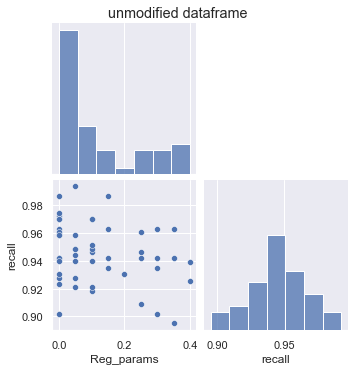

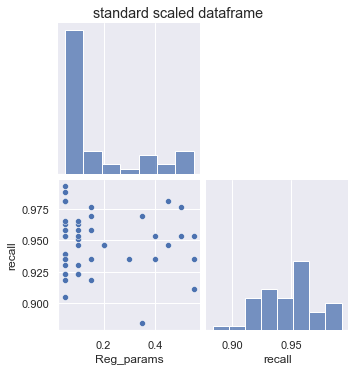

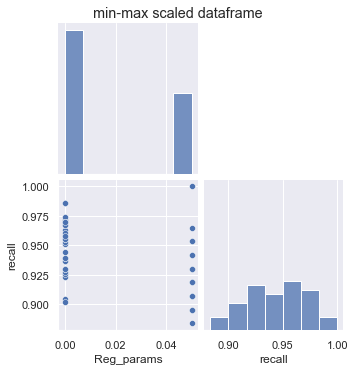

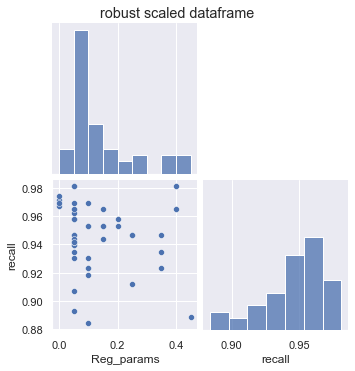

In [327]:
#Plot the distributions of Reg_params and recall and its relation:
unmodified = preprocessing.StandardScaler() # to avoid error
standard_scal = preprocessing.StandardScaler()
min_max_scal = preprocessing.MinMaxScaler()
robust_scal = preprocessing.RobustScaler()
y = train_diag_Cancer_df.diagnosis
X  = train_diag_Cancer_df.copy()
X.drop('diagnosis',axis=1,inplace=True)

scaling_types=['unmodified', 'standard scaled', 'min-max scaled', 'robust scaled']
z=0
for scaling_obj in [unmodified, standard_scal, min_max_scal, robust_scal]:   
    recall_list, reg_params=gridsearch_qda (X,y, scaling_obj)
    title= (scaling_types[z]+' dataframe')
    pairplot_reg_params_recall (recall_list, reg_params, title )
    print(f'Average recall with '+scaling_types[z]+' dataframe:'+ str(round(sum(recall_list)/len(recall_list),3)))
    z+=1
    



According to the best reg_param distributions the optimised value is **0,05**. And the best mean average correspond to **standard scaling**.

In [230]:
best_QDA = QuadraticDiscriminantAnalysis(reg_param=0.05)

## test_X prediction

As seen in the previous section, the best method is the Quadratic Discriminant Analysis. We proceed to fit with the whole training dataset standarized to get the best performance:

In [232]:
y_training=X_train_standard.diagnosis
x_training=X_train_standard.copy()
x_training.drop('diagnosis',axis=1, inplace=True)

In [233]:
best_QDA.fit(x_training, y_training)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.05,
                              store_covariance=False, tol=0.0001)

Charge test_X dataset to be predicted. We check its statistically ressemblance to the training data set.:

In [240]:
test_x=pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Access_Project_Hackathon_IT_Decathlon\initial docs\test.csv',index_col=False)
test_x.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [241]:
test_x.shape

(114, 30)

In [242]:
test_x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   114.000000    114.000000      114.000000   114.000000   
mean     14.080561     19.223246       91.502018   643.151754   
std       3.098263      4.451322       21.375850   302.252445   
min       8.597000     10.380000       54.090000   221.200000   
25%      11.697500     16.040000       75.582500   421.475000   
50%      13.500000     18.760000       87.470000   555.150000   
75%      16.045000     21.780000      105.550000   801.075000   
max      25.730000     33.810000      174.200000  2010.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       114.000000        114.000000      114.000000           114.000000   
mean          0.094411          0.099489        0.080914             0.046263   
std           0.014287          0.052283        0.074235             0.037399   
min           0.064290          0.023440        0.000000             0.000000   
25%           0.083950          0.061023        0.025683             0.018045   
50%           0.092455          0.085920        0.054505             0.032100   
75%           0.102250          0.127825        0.110250             0.065710   
max           0.142500          0.283900        0.336800             0.191300   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     114.000000              114.000000  ...    114.000000   
mean        0.180534                0.062289  ...     16.239298   
std         0.028599                0.007128  ...      4.586637   
min         0.106000                0.050240  ...      8.952000   
25%         0.161725                0.056755  ...     13.070000   
50%         0.176700                0.061460  ...     14.880000   
75%         0.195175                0.065457  ...     19.695000   
max         0.274300                0.097440  ...     33.130000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     114.000000       114.000000   114.000000        114.000000   
mean       25.095000       107.028509   872.720175          0.127924   
std         6.228466        32.000737   549.816427          0.022095   
min        12.490000        56.650000   240.100000          0.071170   
25%        20.685000        83.787500   523.975000          0.113775   
50%        25.265000        97.505000   675.150000          0.128450   
75%        29.062500       128.800000  1198.750000          0.141175   
max        47.160000       229.300000  3432.000000          0.209800   

       compactness_worst  concavity_worst  concave points_worst  \
count         114.000000       114.000000            114.000000   
mean            0.243361         0.248026              0.110261   
std             0.156545         0.194433              0.064967   
min             0.027290         0.000000              0.000000   
25%             0.117275         0.092397              0.062960   
50%             0.210700         0.193950              0.099575   
75%             0.341475         0.358100              0.157750   
max             0.866300         0.772700              0.275600   

       symmetry_worst  fractal_dimension_worst  
count      114.000000               114.000000  
mean         0.289082                 0.082495  
std          0.070150                 0.017634  
min          0.156600                 0.058650  
25%          0.246225                 0.070930  
50%          0.277850                 0.078155  
75%          0.319375                 0.091390  
max          0.663800                 0.173000  

[8 rows x 30 columns]

In [260]:
train_diag_Cancer_df.drop('diagnosis',axis=1).describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   455.000000    455.000000      455.000000   455.000000   
mean     14.139000     19.306286       92.086044   657.829890   
std       3.625935      4.267421       24.998077   363.536865   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.705000     16.210000       75.015000   419.250000   
50%      13.300000     18.890000       85.980000   546.400000   
75%      15.740000     21.795000      103.650000   777.250000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       455.000000        455.000000      455.000000           455.000000   
mean          0.096849          0.105557        0.090775             0.049585   
std           0.013981          0.052932        0.080993             0.039159   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086740          0.066735        0.030180             0.020720   
50%           0.096860          0.094860        0.063870             0.033840   
75%           0.106050          0.130450        0.132200             0.074490   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     455.000000              455.000000  ...    455.000000   
mean        0.181319                0.062925  ...     16.276679   
std         0.027140                0.007045  ...      4.897917   
min         0.116700                0.049960  ...      7.930000   
25%         0.162050                0.057885  ...     12.980000   
50%         0.179700                0.061550  ...     14.990000   
75%         0.195800                0.066375  ...     18.550000   
max         0.304000                0.095750  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     455.000000       455.000000   455.000000        455.000000   
mean       25.823099       107.319516   882.553187          0.133482   
std         6.123728        34.025815   574.721873          0.022902   
min        12.020000        50.410000   185.200000          0.081250   
25%        21.350000        84.290000   513.950000          0.118350   
50%        25.440000        97.660000   688.600000          0.132600   
75%        29.990000       124.950000  1047.000000          0.147950   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         455.000000       455.000000            455.000000   
mean            0.256997         0.278242              0.115695   
std             0.157587         0.211802              0.065949   
min             0.034320         0.000000              0.000000   
25%             0.151650         0.119350              0.065080   
50%             0.215600         0.229900              0.099930   
75%             0.333800         0.387200              0.161950   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      455.000000               455.000000  
mean         0.290325                 0.084309  
std          0.059696                 0.018168  
min          0.156500                 0.055040  
25%          0.251550                 0.071835  
50%          0.283300                 0.080190  
75%          0.317500                 0.092070  
max          0.577400                 0.207500  

[8 rows x 30 columns]

Statiscally, features in test_x are very similar to  the training set. Then, it can be proceed as the training to get the predictions:
    1st standarize the dataset
    2nd apply the best model fitted with the whole training data set.

In [271]:
X_test_standard = standard_scaler.transform(test_x)
X_test_standard = pd.DataFrame(X_test_standard, columns =numerical_cols)
X_test_standard.describe()

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   114.000000    114.000000      114.000000  114.000000       114.000000   
mean     -0.016135     -0.019481       -0.023389   -0.040420        -0.174581   
std       0.855413      1.044242        0.856041    0.832337         1.022982   
min      -1.530116     -2.094031       -1.521632   -1.202383        -2.331333   
25%      -0.674085     -0.766243       -0.660919   -0.650869        -0.923601   
50%      -0.176424     -0.128154       -0.184859   -0.282758        -0.314611   
75%       0.526236      0.580312        0.539193    0.394466         0.386749   
max       3.200211      3.402448        3.288427    3.723580         3.268804   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        114.000000      114.000000           114.000000     114.000000   
mean          -0.114761       -0.121882            -0.084911      -0.028953   
std            0.988828        0.917563             0.956119       1.054944   
min           -1.553070       -1.122005            -1.267647      -2.778309   
25%           -0.842274       -0.804562            -0.806320      -0.722772   
50%           -0.371388       -0.448307            -0.446999      -0.170386   
75%            0.421160        0.240718             0.412252       0.511104   
max            3.373001        3.040943             3.623004       3.429801   

       fractal_dimension_mean  ...  radius_worst  texture_worst  \
count              114.000000  ...    114.000000     114.000000   
mean                -0.090308  ...     -0.007640      -0.119029   
std                  1.012855  ...      0.937477       1.018223   
min                 -1.802433  ...     -1.497114      -2.179681   
25%                 -0.876702  ...     -0.655423      -0.839971   
50%                 -0.208157  ...     -0.285472      -0.091237   
75%                  0.359857  ...      0.698681       0.529574   
max                  4.904323  ...      3.444704       3.488135   

       perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
count       114.000000  114.000000        114.000000         114.000000   
mean         -0.008562   -0.017128         -0.242933          -0.086622   
std           0.941519    0.957718          0.965818           0.994477   
min          -1.490788   -1.119081         -2.723781          -1.459252   
25%          -0.692354   -0.624603         -0.861434          -0.887607   
50%          -0.288761   -0.361273         -0.219961          -0.294109   
75%           0.631994    0.550779          0.336273           0.536661   
max           3.588885    4.440849          3.336005           3.870699   

       concavity_worst  concave points_worst  symmetry_worst  \
count       114.000000            114.000000      114.000000   
mean         -0.142821             -0.082487       -0.020846   
std           0.919004              0.986192        1.176417   
min          -1.315135             -1.756246       -2.242576   
25%          -0.878411             -0.800515       -0.739555   
50%          -0.398415             -0.244700       -0.209201   
75%           0.377453              0.638395        0.487178   
max           2.337092              2.427356        6.263221   

       fractal_dimension_worst  
count               114.000000  
mean                 -0.099975  
std                   0.971683  
min                  -1.413915  
25%                  -0.737246  
50%                  -0.339124  
75%                   0.390169  
max                   4.887156  

[8 rows x 30 columns]

In [264]:
train_diag_Cancer_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         10.710         20.39           69.50      344.9          0.10820   
1         13.640         16.34           87.21      571.8          0.07685   
2         11.710         17.19           74.68      420.3          0.09774   
3         15.300         25.27          102.40      732.4          0.10820   
4         14.450         20.22           94.49      642.7          0.09872   
..           ...           ...             ...        ...              ...   
450       13.170         21.81           85.42      531.5          0.09714   
451       15.100         16.39           99.58      674.5          0.11500   
452       14.710         21.59           95.55      656.9          0.11370   
453        9.606         16.84           61.64      280.5          0.08481   
454        8.950         15.76           58.74      245.2          0.09462   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.12890         0.08448              0.02867         0.1668   
1             0.06059         0.01857              0.01723         0.1353   
2             0.06141         0.03809              0.03239         0.1516   
3             0.16970         0.16830              0.08751         0.1926   
4             0.12060         0.11800              0.05980         0.1950   
..                ...             ...                  ...            ...   
450           0.10470         0.08259              0.05252         0.1746   
451           0.18070         0.11380              0.08534         0.2001   
452           0.13650         0.12930              0.08123         0.2027   
453           0.09228         0.08422              0.02292         0.2036   
454           0.12430         0.09263              0.02308         0.1305   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.06862  ...        11.690          25.21   
1                   0.05953  ...        14.670          23.19   
2                   0.06095  ...        13.010          21.39   
3                   0.06540  ...        20.270          36.71   
4                   0.06466  ...        18.330          30.12   
..                      ...  ...           ...            ...   
450                 0.06177  ...        16.230          29.89   
451                 0.06467  ...        16.110          18.33   
452                 0.06758  ...        17.870          30.70   
453                 0.07125  ...        10.750          23.07   
454                 0.07163  ...         9.414          17.07   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0              76.51       410.4            0.1335             0.2550   
1              96.08       656.7            0.1089             0.1582   
2              84.42       521.5            0.1323             0.1040   
3             149.30      1269.0            0.1641             0.6110   
4             117.90      1044.0            0.1552             0.4056   
..               ...         ...               ...                ...   
450           105.50       740.7            0.1503             0.3904   
451           105.90       762.6            0.1386             0.2883   
452           115.70       985.5            0.1368             0.4290   
453            71.25       353.6            0.1233             0.3416   
454            63.34       270.0            0.1179             0.1879   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.2534               0.08600          0.2605   
1             0.1050               0.08586          0.2346   
2             0.1521               0.10990          0.2572   
3             0.6335               0.20240          0.4027   
4             0.4967               0.18380          0.4753   
..               ...                   ...             ...   
450           0.3728               0.16070         

In [273]:
x_test_pred = best_QDA.predict(X_test_standard)
x_test_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [274]:
predictions_df=pd.DataFrame(x_test_pred,columns=['diagnosis'])
predictions_df

diagnosis
0            0
1            0
2            0
3            1
4            0
..         ...
109          0
110          0
111          0
112          1
113          0

[114 rows x 1 columns]

In [276]:
predictions_df.to_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Access_Project_Hackathon_IT_Decathlon\predictions.csv',index=False)

In [277]:
pip list > requirements.txt #generates file with all packages installed in the environment used

Note: you may need to restart the kernel to use updated packages.
